![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [3]:
# Lectura de la información de archivo .csv

bikes = pd.read_csv("/Users/LinaH/Documents/GitHub/MIAD_ML_NLP_2023/datasets/bikeshare.csv",index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"

bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 

bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head(4)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1

#season : season (1:winter, 2:spring, 3:summer, 4:fall) 
#cnt: count of total rental bikes including both casual and registered 

print ("\n ANÁLISIS DESCRIPTIVO POR ESTACIÓN \n ")
print(bikes.groupby('season').total.describe())





 ANÁLISIS DESCRIPTIVO POR ESTACIÓN 
 
         count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0


Como es de esperarse el número promedio de bicicletas rentadas en verano(3) con 197, es mayor que en invierno(1) con solo 125. 


Una mayor desviación estandár también en verano(3), seguido de primavera (2). 

Sin embargo podemos evidenciar que el 25% de los datos para verano(3) se concentran hasta las 68 bicicletas, seguido de invierno hasta 51.

Tanto en primavera, otoño y verano el 75% de las rentas de bicicletas estan muy parejos con cerca de 300, sin embargo, en invierno solo se concentran hasta los 164. 

En verano se ha rentado el mayor número de viajes con un total de 977. 


In [5]:
# Celda 1.2
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


Sobre las 5:00 p.m es donde se presenta la mayor renta promedio de bicicletas con un total de 469. Asi mismo en las horas pico (8:00 a.m, 5:00 p.m y 6:00) se presenta el mayor número de promedio de rentas.


Como es de esperarse en la madrugada es donde se presenta el menor número de rentas (12:00 y 5:00 a.m). 


El máximo de rentas registrado es sobre las 4:00 p.m. con un total de 783.

Solo en el horario entre las 7:00 a.m y 8:00 p.m el 25% supera los 200 rentas, mientras que las horas pico superan casi los 400. 

Mientras que el 75% de las rentas en horas picos se concentran hasta los 500. 


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

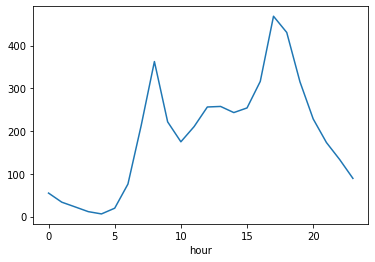

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

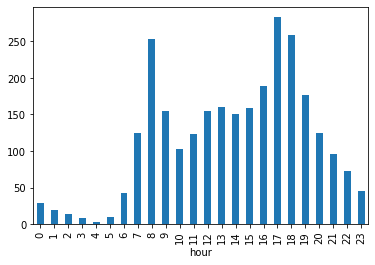

In [7]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

invierno = bikes[(bikes['season']== 1)]
invierno.groupby(['hour'])['total'].mean().plot(kind="bar")


El número de bicicletas rentadas promedio en Invierno tiene tres picos, especificamente sobre las 8:00 a.m,  5:00 y 6:00 p.m. 

En horas de la tarde (12:00 a 4:00 p.m) el número de bicicletas rentadas es uniforme alrededor de las 150. 

En menor cantidades sobre la madrugada, lo que se encuentra lógico por el tema de la seguridad y bajas temperaturas. 

<AxesSubplot:xlabel='hour'>

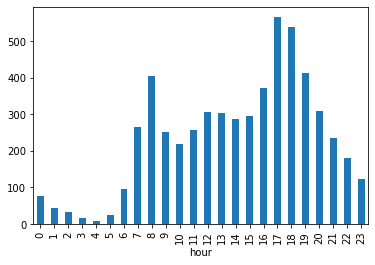

In [8]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

verano = bikes[(bikes['season']== 3)]
verano.groupby(['hour'])['total'].mean().plot(kind="bar")



Podemos evidenciar que también se tienen tres picos en las mismas horas (8:00 a.m, 5:00 y 6:00 p.m), sin embargo el número de bicicletas rentadas promedio en verano en la tarde es mucho mayor.

En horas de la tarde desde las 12:00 hasta las 3:00 p.m se tienen un número de bicicletas rentadas casi uniforme casi sobre las 300. 

Pocas rentas en la madrugada.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [9]:
# Celda 3

X = bikes[['season','hour']]
Y = bikes['total']

X = pd.get_dummies(X, columns=["season"])

# Create linear regression object
regr = LinearRegression()

# Model
regr.fit(X, Y)

# Make predictions
Predict = regr.predict(X)

# The coefficients
print("Coefficients: \n", regr.coef_)

# hour	season_1	season_2	season_3	season_4

#Predicción: 

prediccion=regr.predict(X)
MSE=np.average(np.square(prediccion-Y))
print("El MSE del modelo es igual a:")
print(MSE)




Coefficients: 
 [ 10.54520609 -75.96697493  24.35025698  43.50057501   8.11614294]
El MSE del modelo es igual a:
25480.694694371625


#season (1:winter, 2:spring, 3:summer, 4:fall) 

Para el coeficiente de "hour" indica que por cada hora adicional se espera que aumente en promedio 10 rentas de bicicletas. 

Para los coeficientes de season, se puede afirmar que cuando es winter(1), se espera que disminuya en promedio 75 bicicletas rentadas, mientras que cuando es spring(2) se espera que aumente 24, cuando es summer(3) en 43 rentas en promedio y finalmente 8 cuando es fall(4). 


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [10]:
# Celda 4

# Definición de la función que calcula el gini index

def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k

def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol

def best_split(X, y, num_pct):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

# Aplicación de la función tree_grow

tree_grow(X, Y, level=0, min_gain=0.001, max_depth=3, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 382.8088308604629},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 743.095592335012}},
  'sr': {'y_pred': 1,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': [1, 1.0],
   'n_samples': 455,
   'gain': 5197.1071057533845,
   'sl': {'y_pred': 1,
    'y_prob': 241.01162790697674,
    'level': 3,
    'split': -1,
    'n_samples': 342,
    'gain': 467.29291918881063},
   'sr': {'y_pr

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la librería sklearn, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [11]:
#División de los datos

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)


max_depth_range = range(1, 6)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
mse = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    mse.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='r2').mean())


# Mejor MSE (desempeño del modelo) y su correspondiente max_depth

print("El mejor mse y profundidad es:", sorted(zip(mse, max_depth_range))[::-1][0])

clf = DecisionTreeClassifier(max_depth=4, random_state=1)
clf.fit(X_train, y_train)

#Predicción: 

prediccion=clf.predict(X_test)
MSEArbol=np.average(np.square(prediccion-y_test))
print("El MSE del modelo en la muestra de evaluación es igual a:")
print(MSEArbol)

El mejor mse y profundidad es: (0.23441055484211776, 4)
El MSE del modelo en la muestra de evaluación es igual a:
23540.842027920648


El error cuadratico medio es mejor en el arbol de decisión con 23.540, mientras que con Regresión lineal es mayor con 25.480. 

Por lo tanto podemos afirmar que el arbol tiene un mejor desempeño. 

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [12]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [13]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [14]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [15]:
# Celda 6

########################## Árbol ####################################

max_depth_range = range(1, 10) 

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
print(sorted(zip(accuracy_scores, max_depth_range))[::-1][0])
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

#Predicción: 

prediccion=clf.predict(X_test)


print("Precisión del Árbol de Decisión-Accuracy es : ", metrics.accuracy_score(y_test, prediccion))
print("El F1-score del Árbol de Decisión es: ", metrics.f1_score(y_test, prediccion))

#Es decir, el modelo acierta el 75%


########################## Regresión logistica ####################################

def Reg_log (X_train, X_test, y_train, y_test):
    modelo = LogisticRegression()
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    Accuracy = metrics.accuracy_score(y_test, predicciones)
    F1 = metrics.f1_score(y_test, predicciones)

    print("Precisión de la Regresión logistica-Accuracy es:", Accuracy)
    print("El F1-score de la Regresión logistica es:", F1)
    
    return Accuracy,F1

Reg_log (X_train, X_test, y_train, y_test)

(0.6308888888888888, 2)
Precisión del Árbol de Decisión-Accuracy es :  0.6453333333333333
El F1-score del Árbol de Decisión es:  0.6448598130841121
Precisión de la Regresión logistica-Accuracy es: 0.6126666666666667
El F1-score de la Regresión logistica es: 0.6098052384150436


(0.6126666666666667, 0.6098052384150436)

Ambos modelos tienen un accuracy parecio, pero también aceptable.
Sin embargo el árbol de decisión se comporta un poco mejor con un acurracy y F de 0.64

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

### 100 árboles de decisión con max_depth 

In [16]:
# Celda 7

from sklearn.ensemble import BaggingClassifier

max_depth=4

arbol = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth= max_depth), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria

arbol.fit(X_train, y_train)
y_pred_arbol = arbol.predict(X_test)

print("El F1-Score del 1 Árbol de decisión es:",metrics.f1_score(y_pred_arbol, y_test))
print("El Accuracy del 1 Árbol de decisión es:",metrics.accuracy_score(y_pred_arbol, y_test)) 

El F1-Score del 1 Árbol de decisión es: 0.6419420094403236
El Accuracy del 1 Árbol de decisión es: 0.646


### 100 árboles de decisión con min_samples_leaf

In [17]:
#100 árboles de decisión donde min_samples_leaf tome un valor de su elección

min_samples_leaf= 50

arbol_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=min_samples_leaf), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
arbol_2.fit(X_train, y_train)
y_pred_arbol_2 = arbol_2.predict(X_test)
print("El F1-Score del 2 Árbol de decisión es:",metrics.f1_score(y_pred_arbol_2, y_test))
print("El Accuracy del 2 Árbol de decisión es:",metrics.accuracy_score(y_pred_arbol_2, y_test)) 

El F1-Score del 2 Árbol de decisión es: 0.6711229946524064
El Accuracy del 2 Árbol de decisión es: 0.672


### 100 regresiones logísticas

In [18]:
RL = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
RL.fit(X_train, y_train)
y_pred_RL = RL.predict(X_test)
print("El F1-Score de la Regresión Logistica es:",metrics.f1_score(y_pred_RL, y_test))
print("El Accuracy de la Regresión Logistica es:",metrics.accuracy_score(y_pred_RL, y_test)) 


El F1-Score de la Regresión Logistica es: 0.6126855600539811
El Accuracy de la Regresión Logistica es: 0.6173333333333333


### ensamble de modelos 

In [19]:
RL= pd.DataFrame(y_pred_RL)
Arbol = pd.DataFrame(y_pred_arbol)
Arbol_2 = pd.DataFrame(y_pred_arbol_2)
pred = pd.concat([RL, Arbol, Arbol_2], axis=1)
pred.columns = ["RL", "Arbol", "Arbol_2"]
pred["suma"]=  pred.sum(axis=1)
pred['new_pred'] = np.where(pred['suma']<2, 0, 1)

In [20]:
print("El F1-Score de ensamble es:",metrics.f1_score(pred["new_pred"], y_test))
print("El Accuracy de ensamble es:",metrics.accuracy_score(pred["new_pred"], y_test)) 


El F1-Score de ensamble es: 0.6541049798115747
El Accuracy de ensamble es: 0.6573333333333333


### Comparación de modelos

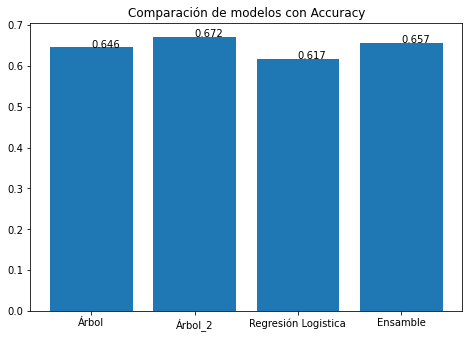

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos con Accuracy")
ejeX = ['Árbol','Árbol_2','Regresión Logistica', "Ensamble"]
ejeY = [metrics.accuracy_score(y_pred_arbol, y_test), metrics.accuracy_score(y_pred_arbol_2, y_test),round(metrics.accuracy_score(y_pred_RL, y_test),3),round(metrics.accuracy_score(pred["new_pred"], y_test),3)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Podemos evidenciar que el modelo con mejor desempeño es el arból donde especificamos el número mínimo de muestras que debe haber en un nodo (final  min_samples_leaf) con un accuracy de 0.67, incluso mucho mejor que el ensamble de las 300 muestras. 

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

### 100 árboles de decisión con max_depth

In [22]:
# Celda 8

max_depth=4

arbol_pon = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth= max_depth), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Ajuste

arbol_pon.fit(X_train, y_train)


# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(arbol_pon.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], arbol_pon.n_estimators))

for i in range(arbol_pon.n_estimators):
    oob_sample = ~arbol_pon.estimators_samples_[i]
    y_pred_ = arbol_pon.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = arbol_pon.estimators_[i].predict(X_test)
  

alpha = (1 - errors) / (1 - errors).sum()
y_pred_arbol_pon = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)


# Desempeño al hacer votación ponderada

print("El F1-Score del árbol es:",metrics.f1_score(y_pred_arbol_pon, y_test))
print("El Accuracy del árbol es:",metrics.accuracy_score(y_pred_arbol_pon, y_test)) 



El F1-Score del árbol es: 0.6455525606469003
El Accuracy del árbol es: 0.6493333333333333


### 100 árboles de decisión con min_samples_leaf

In [23]:
min_samples_leaf= 50

arbol_2_pon = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=min_samples_leaf), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Ajuste

arbol_2_pon.fit(X_train, y_train)


# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(arbol_2_pon.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], arbol_2_pon.n_estimators))

for i in range(arbol_pon.n_estimators):
    oob_sample = ~arbol_2_pon.estimators_samples_[i]
    y_pred_ = arbol_2_pon.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = arbol_2_pon.estimators_[i].predict(X_test)
  

alpha = (1 - errors) / (1 - errors).sum()
y_pred_arbol2_pon = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)
    
# Desempeño al hacer votación ponderada

print("El F1-Score del árbol es:",metrics.f1_score(y_pred_arbol2_pon, y_test))
print("El Accuracy del árbol es:",metrics.accuracy_score(y_pred_arbol2_pon, y_test)) 

El F1-Score del árbol es: 0.6697798532354903
El Accuracy del árbol es: 0.67


### 100 regresiones logísticas

In [24]:
RL_pon = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)


# Ajuste 

RL_pon.fit(X_train, y_train)


# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(RL_pon.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], RL_pon.n_estimators))

for i in range(RL_pon.n_estimators):
    oob_sample = ~RL_pon.estimators_samples_[i]
    y_pred_ = RL_pon.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = RL_pon.estimators_[i].predict(X_test)
  

alpha = (1 - errors) / (1 - errors).sum()
y_pred_RL_pon = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)
    


print("El F1-Score de la Regresión Logistica es:",metrics.f1_score(y_pred_RL_pon, y_test))
print("El Accuracy de la Regresión Logistica es:",metrics.accuracy_score(y_pred_RL_pon, y_test)) 



El F1-Score de la Regresión Logistica es: 0.614969656102495
El Accuracy de la Regresión Logistica es: 0.6193333333333333


### ensamble de modelos 

In [25]:
RL_pon= pd.DataFrame(y_pred_RL_pon)
Arbol_pon = pd.DataFrame(y_pred_arbol_pon)
Arbol_2_pon = pd.DataFrame(y_pred_arbol2_pon)
pred_pon = pd.concat([RL_pon, Arbol_pon, Arbol_2_pon], axis=1)
pred_pon.columns = ["RL", "Arbol", "Arbol_2"]
pred_pon["suma"]=  pred_pon.sum(axis=1)
pred_pon['new_pred'] = np.where(pred_pon['suma']<2, 0, 1)
print("El F1-Score del modelo de ensamble es:",metrics.f1_score(pred_pon["new_pred"], y_test))
print("El Accuracy del modelo de ensamble es:",metrics.accuracy_score(pred_pon["new_pred"], y_test)) 

El F1-Score del modelo de ensamble es: 0.6545454545454545
El Accuracy del modelo de ensamble es: 0.658


### Comparación de modelos

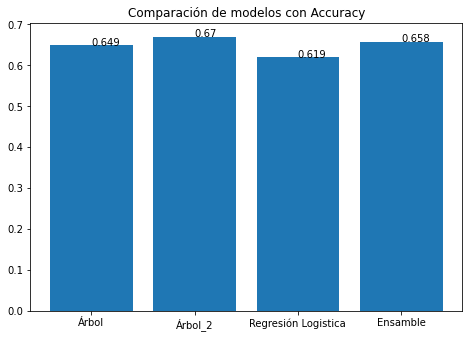

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos con Accuracy")
ejeX = ['Árbol','Árbol_2','Regresión Logistica', "Ensamble"]
ejeY = [round(metrics.accuracy_score(y_pred_arbol_pon, y_test),3), round(metrics.accuracy_score(y_pred_arbol2_pon, y_test),3),round(metrics.accuracy_score(y_pred_RL_pon, y_test),3),round(metrics.accuracy_score(pred_pon["new_pred"], y_test),3)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Al igual que en votación mayoritaria el modelo con mejor desempeño es el arból donde especificamos el número mínimo de muestras que debe haber en un nodo (final  min_samples_leaf) con un accuracy de 0.67, incluso mucho mejor que el ensamble de las 300 muestras. 

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

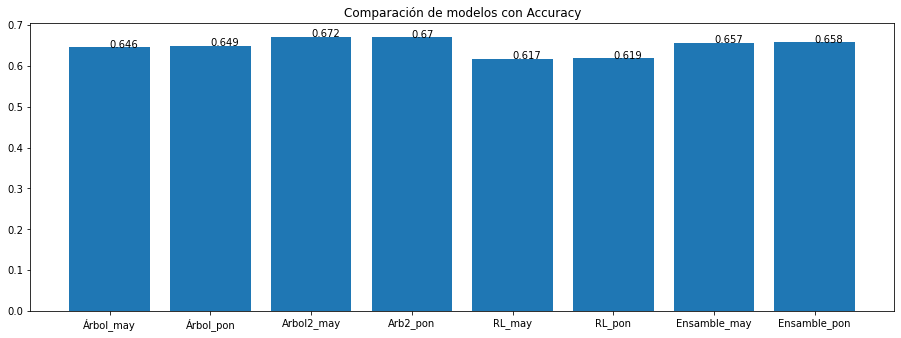

In [27]:
# Celda 9

fig = plt.figure()
ax = fig.add_axes([2,2,2,1])
ax.set_title("Comparación de modelos con Accuracy")
ejeX = ['Árbol_may','Árbol_pon','Arbol2_may', "Arb2_pon",'RL_may', "RL_pon",'Ensamble_may', "Ensamble_pon", ]
ejeY = [round(metrics.accuracy_score(y_pred_arbol, y_test),3),round(metrics.accuracy_score(y_pred_arbol_pon, y_test),3), round(metrics.accuracy_score(y_pred_arbol_2, y_test),3),round(metrics.accuracy_score(y_pred_arbol2_pon, y_test),3),round(metrics.accuracy_score(y_pred_RL, y_test),3),round(metrics.accuracy_score(y_pred_RL_pon, y_test),3),round(metrics.accuracy_score(pred["new_pred"], y_test),3),round(metrics.accuracy_score(pred_pon["new_pred"], y_test),3)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Tanto en votación como mayoritaria como en ponderación el accuracy es muy similar en todos los modelos. 

Asi mismo el modelo con mejor desempeño en ambos casos son el ensamble de los 100 arboles de decisión al ajustar el parámetro (min_samples_leaf) con un accuracy de 0.67. 

Teniendo en cuenta que no varía el desempeño, por simplicidad considero que es mejor hacer ensambles por medio de votación mayoritaria.


Incluso podemos evidenciar como el poder predictivo de árboles son muchos mejor que la regresión logística. 